# Loading datasets

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytz
import seaborn as sns
import sys
from tqdm import tqdm

sys.path.append("../")
pd.options.display.max_colwidth = 50
sns.set_style("whitegrid")

In [2]:
candidates_file_path = "../data/processed/se_candidates_output_3.csv"
raw_cand_df = pd.read_csv(candidates_file_path, sep=";", encoding="utf-8")

print(raw_cand_df.shape)
raw_cand_df.info()

(1250, 79)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     1250 non-null   object 
 1   HH_GERACAO                     1250 non-null   object 
 2   ANO_ELEICAO                    1250 non-null   int64  
 3   CD_TIPO_ELEICAO                1250 non-null   int64  
 4   NM_TIPO_ELEICAO                1250 non-null   object 
 5   NR_TURNO                       1250 non-null   int64  
 6   CD_ELEICAO                     1250 non-null   int64  
 7   DS_ELEICAO                     1250 non-null   object 
 8   DT_ELEICAO                     1250 non-null   object 
 9   TP_ABRANGENCIA                 1250 non-null   object 
 10  SG_UF                          1250 non-null   object 
 11  SG_UE                          1250 non-null   object 
 12  NM_UE                          1250 n

In [3]:
tweets_file_path = "../data/processed/sp_elected_state_deputies_tweets-2023-07-12 20:37:33.csv"
raw_tweets_df = pd.read_csv(tweets_file_path, sep=";", encoding="utf-8")

print(raw_tweets_df.shape)
raw_tweets_df.info()

(46973, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46973 entries, 0 to 46972
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       46973 non-null  object 
 1   date                      46973 non-null  object 
 2   content                   46973 non-null  object 
 3   user                      46973 non-null  object 
 4   reply_count               46973 non-null  int64  
 5   retweet_count             46973 non-null  int64  
 6   like_count                46973 non-null  int64  
 7   quote_count               46973 non-null  int64  
 8   in_reply_to_id            43445 non-null  float64
 9   in_reply_to_user          43328 non-null  object 
 10  conversation_id           46973 non-null  object 
 11  conversation_user         46973 non-null  object 
 12  ru_bert_base_label        46973 non-null  bool   
 13  ru_bert_base_score        46973 non-null  float64

# Pre Processamento

In [4]:
# Mantendo cópia dos datasets iniciais
cand_df = raw_cand_df
tweets_df = raw_tweets_df

### Candidatos

In [5]:
# Removendo colunas não utilizadas
cand_cols = [
    "SG_UF", "DS_CARGO", "SQ_CANDIDATO", "NM_URNA_CANDIDATO", "NR_PARTIDO", "SG_PARTIDO", 
    "NM_MUNICIPIO_NASCIMENTO", "NR_IDADE_DATA_POSSE", "DS_GENERO", "DS_GRAU_INSTRUCAO", 
    "DS_ESTADO_CIVIL", "DS_COR_RACA", "DS_OCUPACAO", "DS_SIT_TOT_TURNO", "ST_REELEICAO", 
    "TW_USER", "TW_followersCount", "TW_friendsCount", "TW_statusesCount", "TW_favouritesCount"
]
cand_df = cand_df[cand_cols]
print(cand_df.shape)

(1250, 20)


In [6]:
# Filtrando somente os deputados estaduais de SP
cand_df = cand_df[cand_df['SG_UF'] == 'SP']
cand_df = cand_df[cand_df['DS_CARGO'] == 'DEPUTADO ESTADUAL']
cand_df.shape

(306, 20)

In [7]:
# Convertendo usernames para minusculo
cand_df['TW_USER'] = cand_df['TW_USER'].str.lower()

In [8]:
cand_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 2 to 1249
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SG_UF                    306 non-null    object 
 1   DS_CARGO                 306 non-null    object 
 2   SQ_CANDIDATO             306 non-null    int64  
 3   NM_URNA_CANDIDATO        306 non-null    object 
 4   NR_PARTIDO               306 non-null    int64  
 5   SG_PARTIDO               306 non-null    object 
 6   NM_MUNICIPIO_NASCIMENTO  306 non-null    object 
 7   NR_IDADE_DATA_POSSE      306 non-null    float64
 8   DS_GENERO                306 non-null    object 
 9   DS_GRAU_INSTRUCAO        306 non-null    object 
 10  DS_ESTADO_CIVIL          306 non-null    object 
 11  DS_COR_RACA              306 non-null    object 
 12  DS_OCUPACAO              306 non-null    object 
 13  DS_SIT_TOT_TURNO         306 non-null    object 
 14  ST_REELEICAO             

### Tweets

In [9]:
tweets_df.columns

Index(['url', 'date', 'content', 'user', 'reply_count', 'retweet_count',
       'like_count', 'quote_count', 'in_reply_to_id', 'in_reply_to_user',
       'conversation_id', 'conversation_user', 'ru_bert_base_label',
       'ru_bert_base_score', 'ru_bert_large_label', 'ru_bert_large_score',
       'ru_mdeberta_base_label', 'ru_mdeberta_base_score',
       'ci_distilbert_base_label', 'ci_distilbert_base_score', 'label_sum'],
      dtype='object')

In [10]:
# Removendo colunas não utilizadas
tweet_cols = [
    "url", "date", "content", "user", "in_reply_to_user", "conversation_user",  
    "reply_count", "retweet_count", "like_count", "quote_count", 
    'ru_bert_base_label', 'ru_bert_base_score', 'ru_bert_large_label', 'ru_bert_large_score',
    'ru_mdeberta_base_label', 'ru_mdeberta_base_score', 'ci_distilbert_base_label', 'ci_distilbert_base_score',
    'label_sum',
]
tweets_df = tweets_df[tweet_cols]
print(tweets_df.shape)

(46973, 19)


In [11]:
# Convertendo a coluna de data para o tipo correto
tweets_df.date = pd.to_datetime(tweets_df.date)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46973 entries, 0 to 46972
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   url                       46973 non-null  object             
 1   date                      46973 non-null  datetime64[ns, UTC]
 2   content                   46973 non-null  object             
 3   user                      46973 non-null  object             
 4   in_reply_to_user          43328 non-null  object             
 5   conversation_user         46973 non-null  object             
 6   reply_count               46973 non-null  int64              
 7   retweet_count             46973 non-null  int64              
 8   like_count                46973 non-null  int64              
 9   quote_count               46973 non-null  int64              
 10  ru_bert_base_label        46973 non-null  bool               
 11  ru_bert_base_sc

/tmp/ipykernel_8580/1363563694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df.date = pd.to_datetime(tweets_df.date)


In [12]:
# Filtrando somente os tweets do período desejado
local_tz = pytz.timezone("America/Sao_Paulo")
since = datetime(year=2022, month=9, day=1, tzinfo=local_tz)
until = datetime(year=2022, month=11, day=1, tzinfo=local_tz)

tweets_df = tweets_df[
    (tweets_df['date'] >= since ) &
    (tweets_df['date'] <= until )
]
tweets_df.shape

(46973, 19)

In [13]:
# Removendo tweets com informação faltando de reply
# Se 'user' é diferente de 'conversation_user', então o tweet deveria ter também 'in_reply_to_user'
# Se não tiver, é por que houve algum erro durante o scraping, ou com o tweet respondido
tweets_df = tweets_df[
    ~((tweets_df['in_reply_to_user'].isnull()) &
    (tweets_df['user'] != tweets_df['conversation_user']))
]
tweets_df.shape

(46919, 19)

In [14]:
# Filtrando somente classificações com score alto 
# min_class_score = 0.99
# tweets_df = tweets_df[tweets_df['class_score'] >= min_class_score]
# tweets_df.shape

In [15]:
# Convertendo usernames para minusculo
tweets_df.user = tweets_df.user.str.lower()
tweets_df.conversation_user = tweets_df.conversation_user.str.lower()
tweets_df.in_reply_to_user = tweets_df.in_reply_to_user.str.lower()

# Explore

0    26398
1     9188
3     6808
2     3701
4      824
Name: label_sum, dtype: int64


<Axes: >

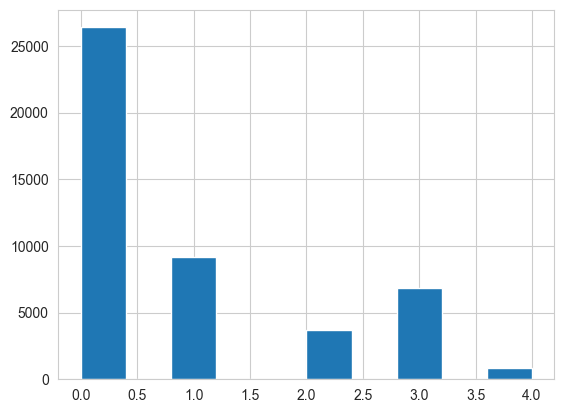

In [16]:
print(tweets_df['label_sum'].value_counts())
tweets_df['label_sum'].hist()

In [17]:
_df = tweets_df[['ru_bert_base_label', 'ru_bert_large_label', 'ru_mdeberta_base_label', 'ci_distilbert_base_label']]
_df.describe()

,ru_bert_base_label,ru_bert_large_label,ru_mdeberta_base_label,ci_distilbert_base_label
count,46919,46919,46919,46919
unique,2,2,2,2
top,False,False,False,False
freq,36665,30058,35521,45122


<Axes: >

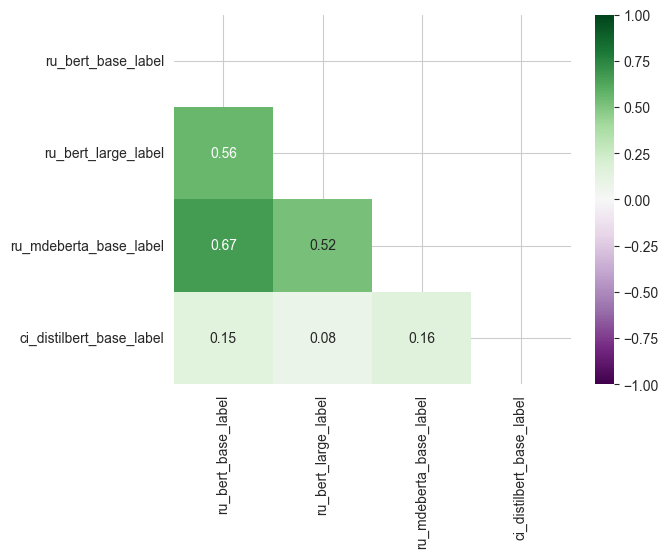

In [18]:
sns.heatmap(
    _df.corr(),
    annot=True, fmt='.2f',
    cmap='PRGn', vmin=-1, vmax=1,
    mask=np.triu(np.ones_like(_df.corr()))
)

In [19]:
pd.options.display.max_colwidth = 500
tweets_df[tweets_df["label_sum"] >= 2][
    ['content', 'ru_bert_base_label', 'ru_bert_large_label', 'ru_mdeberta_base_label', 'ci_distilbert_base_label']
]

,content,ru_bert_base_label,ru_bert_large_label,ru_mdeberta_base_label,ci_distilbert_base_label
105,Não acredite nesses fantasmas que querem distrair com falsas afirmações.\nO Brasil está vendo uma esperança renascer! \n\nAgora é Lula Presidente!\nE Ana Perugini Deputada Estadual!\n\nAna Perugini 1️⃣3️⃣1️⃣2️⃣1️⃣\n\n#AnaPerugini\n#AnaPerugini13121\n#CandidataADeputadaEstadual,True,True,True,False
179,"Pelo jeito, a carruagem virou abóbora antes da hora - https://t.co/nmyNxO0pOu #LulaPresidente1⃣3️⃣",True,True,False,False
200,@anaperugini BOLSONARO CORRUPTO\nConfiscou o dinheiro da educação para entregar para o Centrão.,True,True,False,False
361,@andreawerner_ A Burrice encarecendo os planos de saúde.,True,True,True,False
453,"@andreawerner_ A cada vez q um certo político cita como dele na propaganda eleitoral eu berro seu nome, até meus vizinhos já sabem quem é vc de lambuza rss",True,False,True,False
...,...,...,...,...,...
46906,"Até o momento, as mídias sociais controladas pela empresa de Mark Zuckerberg que buscam por uma solução para estabilizar os acessos.\n#Xerifedoconsumidor #Instagram",True,True,False,False
46932,"O Etanol também ficou mais caro e apresentou um aumento médio de 1,7% em duas semanas consecutivas, já o diesel se manteve estável e teve uma queda de 0,15% em todo Brasil.\n#Xerifedoconsumidor #Gasolina #Etanol",True,True,False,False
46936,A empresa estabeleceu uma multa de até R$ 50 milhões em caso de descumprimento da decisão. Fiquem atentos a tabela de descontos do ICMS e exija seus direitos!!!\n \n#Xerifedoconsumidor #ICMS #Anatel,True,True,False,False
46942,Fique atento a essas informações na hora de comprar o seu produto e exija a nota fiscal!!!\n#Xerifedoconsumidor #diadascriancas,False,True,True,False


In [20]:
# Identificando tweets com com conteúdo repetido
repeated_tweets = (tweets_df.content.value_counts() > 1).loc[lambda x: x == True].index
repeated_tweets = tweets_df[tweets_df['content'].isin(repeated_tweets)]
indexes = repeated_tweets.content.sort_values().index
repeated_tweets = repeated_tweets.reindex(indexes)
repeated_tweets.shape

(2743, 19)

In [21]:
last_tweet = None
drop_list = []
for index, row in repeated_tweets.iterrows():
    if row['content'] == last_tweet:
        drop_list.append(index)
    else:
        last_tweet = row['content']

tweets_df = tweets_df.drop(drop_list)

In [22]:
print(tweets_df.shape)

(44906, 19)


### Mesclando os datasets

In [23]:
df = pd.merge(tweets_df, cand_df, left_on="conversation_user", right_on="TW_USER", how="left")
df.shape

(44906, 39)

In [24]:
# Adicionando coluna para indicar se o tweet foi postado por um candidate
deputies_usernames = list(df.TW_USER.str.lower().unique())
df['user_is_candidate'] = df['user'].apply(lambda u: u in deputies_usernames)
df['user_is_candidate'].value_counts()

False    39876
True      5030
Name: user_is_candidate, dtype: int64

<Axes: >

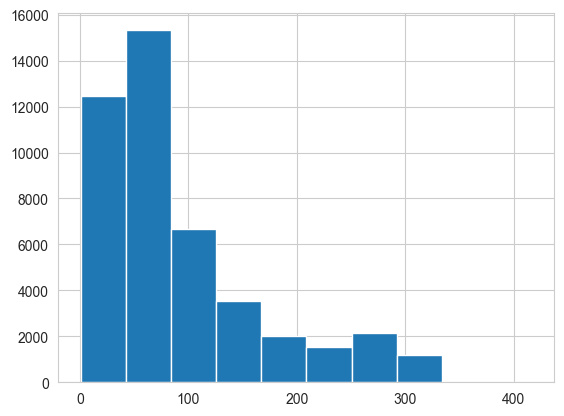

In [25]:
df.content.str.len().hist()

In [26]:
# Filtrando tweets muito pequenos
min_tweet_length = 10
seg_df = df[df.content.str.len() > min_tweet_length]
seg_df.shape

(44854, 40)

# Separando grupo de dados para avaliação manual

In [27]:
seg_df.SG_PARTIDO.value_counts()

PL              19886
PSB             11978
PT               7564
NOVO             2674
PSOL             2341
MDB               156
UNIÃO             123
REPUBLICANOS      108
PSDB               14
PSC                10
Name: SG_PARTIDO, dtype: int64

In [28]:
# Filtrando tweets dos principais partidos de esquerda e direita
seg_df = seg_df.query('SG_PARTIDO in ["PL", "PSB", "PT", "NOVO", "PSOL"]')
seg_df.shape

(44443, 40)

In [29]:
esq_df = seg_df.query('SG_PARTIDO in ["PSB", "PT", "PSOL"]')
dir_df = seg_df.query('SG_PARTIDO in ["PL", "NOVO"]')
print(esq_df.shape, dir_df.shape)

(21883, 40) (22560, 40)


<Axes: xlabel='label_sum', ylabel='count'>

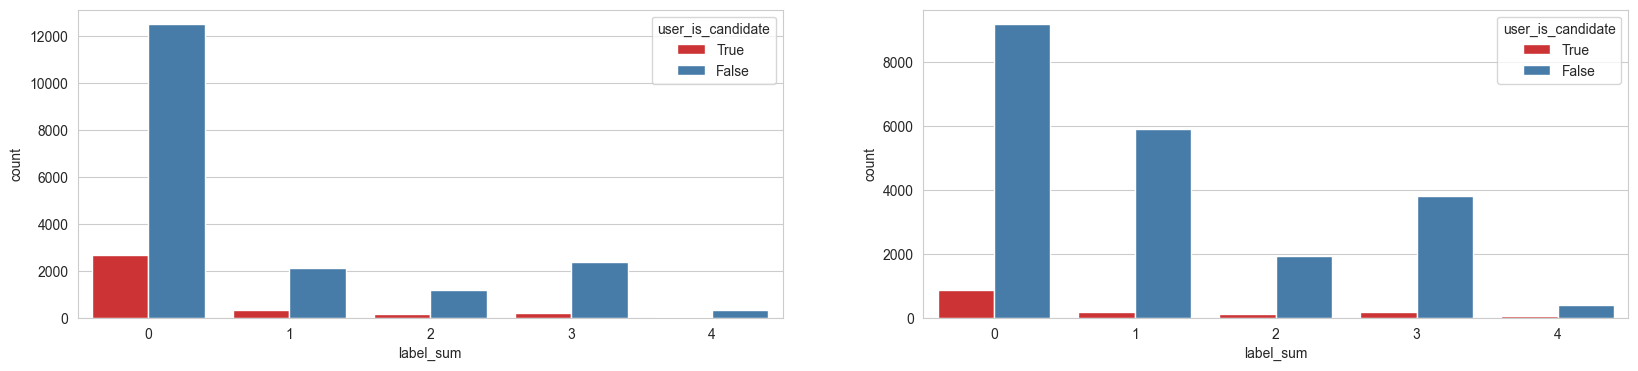

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
sns.countplot(
    esq_df,
    hue="user_is_candidate", 
    x='label_sum',
    palette='Set1',
    hue_order=[True, False],
    ax=ax[0],
)

sns.countplot(
    dir_df,
    hue="user_is_candidate", 
    x='label_sum',
    palette='Set1',
    hue_order=[True, False],
    ax=ax[1],
)

**Vamos considerar ofensa=[2,3,4] e nao-ofensa=[0,1]**

In [31]:
# Tweets ofensivos em threads da esquerda
esq_of_df = esq_df[esq_df['label_sum'] > 1]
esq_of_cand_df = esq_of_df[esq_of_df.user_is_candidate == True]
esq_of_ncand_df = esq_of_df[esq_of_df.user_is_candidate == False]

esq_nof_df = esq_df[esq_df['label_sum'] <= 1]
esq_nof_cand_df = esq_nof_df[esq_df.user_is_candidate == True]
esq_nof_ncand_df = esq_nof_df[esq_df.user_is_candidate == False]

print(esq_of_cand_df.shape, esq_of_ncand_df.shape, esq_nof_cand_df.shape, esq_nof_ncand_df.shape)

(373, 40) (3906, 40) (2983, 40) (14621, 40)


/tmp/ipykernel_8580/1374948680.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  esq_nof_cand_df = esq_nof_df[esq_df.user_is_candidate == True]
/tmp/ipykernel_8580/1374948680.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  esq_nof_ncand_df = esq_nof_df[esq_df.user_is_candidate == False]


In [32]:
# Tweets ofensivos em threads da direita
dir_of_df = dir_df[dir_df['label_sum'] > 1]
dir_of_cand_df = dir_of_df[dir_of_df.user_is_candidate == True]
dir_of_ncand_df = dir_of_df[dir_of_df.user_is_candidate == False]

dir_nof_df = dir_df[dir_df['label_sum'] <= 1]
dir_nof_cand_df = dir_nof_df[dir_df.user_is_candidate == True]
dir_nof_ncand_df = dir_nof_df[dir_df.user_is_candidate == False]

print(dir_of_cand_df.shape, dir_of_ncand_df.shape, dir_nof_cand_df.shape, dir_nof_ncand_df.shape)

(339, 40) (6124, 40) (1036, 40) (15061, 40)


/tmp/ipykernel_8580/4264590099.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dir_nof_cand_df = dir_nof_df[dir_df.user_is_candidate == True]
/tmp/ipykernel_8580/4264590099.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dir_nof_ncand_df = dir_nof_df[dir_df.user_is_candidate == False]


**Limites do recorte**

Total = 2000 tweets

- 50% de threads de esquerda (1000)
    - 30% ofensas (300)
        - 10% candidatos (30)
        - 90% não candidatos (270)
    - 70% não ofensas (700)
        - 10% candidatos (70)
        - 90% não candidatos (630)

- 50% de threads de direita (1000)
    - 30% ofensas (300)
        - 10% candidatos (30)
        - 90% não candidatos (270)
    - 70% não ofensas (700)
        - 10% candidatos (70)
        - 90% não candidatos (630)


In [33]:
_df1 = esq_of_cand_df[:30]
_df2 = esq_of_ncand_df[:270]
_df3 = esq_nof_cand_df[:70]
_df4 = esq_nof_ncand_df[:630]
_df5 = dir_of_cand_df[:30]
_df6 = dir_of_ncand_df[:270]
_df7 = dir_nof_cand_df[:70]
_df8 = dir_nof_ncand_df[:630]

In [34]:
manual_eval_df = pd.concat([_df1, _df2, _df3, _df4, _df5, _df6, _df7, _df8])
manual_eval_df.shape

(2000, 40)

Checando dados para confirmar que a distribuição foi feita corretamente

In [35]:
manual_eval_df.SG_PARTIDO.value_counts()

PL     1000
PSB     903
PT       97
Name: SG_PARTIDO, dtype: int64

In [36]:
manual_eval_df.label_sum.value_counts().sort_values()

4      36
2     196
1     335
3     368
0    1065
Name: label_sum, dtype: int64

In [37]:
manual_eval_df.user_is_candidate.value_counts()

False    1800
True      200
Name: user_is_candidate, dtype: int64

In [38]:
# Tudo certo, vamos exportar o arquivo
output_path = "../data/processed/"
output_file = f"manual_eval_tweets.csv"

manual_eval_df.to_csv(f"{output_path}{output_file}", sep=";", encoding="utf-8", index=False)

### Calculando métricas de ofensa

In [17]:
# Calculando métricas por candidato

def get_tweets(user):
    user_df = df[df['user'] == user]
    return user_df.shape[0]

def get_replies(user):
    user_df = df[df['in_reply_to_user'] == user]
    return user_df.shape[0]

def get_conversation_tweets(user):
    user_df = df[df['conversation_user'] == user]
    return user_df.shape[0]

def get_threads(user):
    user_df = df[df['conversation_user'] == user]
    threads = user_df[user_df['in_reply_to_user'].isna()]
    return threads.shape[0]

def get_user_offenses(user):
    user_df = df[df['conversation_user'] == user]
    offenses = user_df[
        (user_df['class_label'] == True) &
        (user_df['user'] == user)
    ]
    return offenses.shape[0]

def get_reply_offenses(user):
    user_df = df[df['conversation_user'] == user]
    offenses = user_df[
        (user_df['class_label'] == True) &
        (user_df['in_reply_to_user'] == user)
    ]
    return offenses.shape[0]

def get_conversation_offenses(user):
    user_df = df[df['conversation_user'] == user]
    offenses = user_df[user_df['class_label'] == True]
    return offenses.shape[0]


cand_df['TW_tweets'] = cand_df['TW_USER'].apply(get_tweets)
cand_df['TW_replies'] = cand_df['TW_USER'].apply(get_replies)
cand_df['TW_conversation_tweets'] = cand_df['TW_USER'].apply(get_conversation_tweets)
cand_df['TW_threads'] = cand_df['TW_USER'].apply(get_threads)

cand_df['TW_user_offenses'] = cand_df['TW_USER'].apply(get_user_offenses)
cand_df['TW_reply_offenses'] = cand_df['TW_USER'].apply(get_reply_offenses)
cand_df['TW_conversation_offenses'] = cand_df['TW_USER'].apply(get_conversation_offenses)

cand_df['TW_user_offense_rate'] = cand_df['TW_user_offenses'] / cand_df['TW_tweets']
cand_df['TW_reply_offense_rate'] = cand_df['TW_reply_offenses']/ cand_df['TW_replies']
cand_df['TW_conversation_offense_rate'] = cand_df['TW_conversation_offenses'] / cand_df['TW_conversation_tweets']
cand_df['TW_thread_offense_rate'] = cand_df['TW_conversation_offenses'] / cand_df['TW_threads']

In [18]:
cand_df[[
    'TW_tweets', 'TW_replies', 'TW_conversation_tweets', 'TW_threads',
    'TW_user_offenses', 'TW_reply_offenses', 'TW_conversation_offenses',
    'TW_user_offense_rate', 'TW_reply_offense_rate', 'TW_conversation_offense_rate', 'TW_thread_offense_rate',
]].describe()

,TW_tweets,TW_replies,TW_conversation_tweets,TW_threads,TW_user_offenses,TW_reply_offenses,TW_conversation_offenses,TW_user_offense_rate,TW_reply_offense_rate,TW_conversation_offense_rate,TW_thread_offense_rate
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,39.000000,28.000000,25.000000,25.000000
mean,15.862745,131.003268,144.986928,11.029412,2.330065,49.212418,51.450980,0.084172,0.168319,0.172041,1.945006
std,86.454200,1215.540556,1280.375928,54.513729,14.875843,595.544691,605.444315,0.119846,0.156740,0.125259,4.525527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030422,0.120258,0.215054
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016260,0.141502,0.166667,0.315789
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134320,0.254573,0.191888,1.215054
max,1071.000000,17511.000000,18106.000000,472.000000,137.000000,10108.000000,10257.000000,0.449180,0.577237,0.566497,21.730932


In [46]:
# Filtrando somente candidatos que criaram threads no período
# Candidatos que somente responderam a outros tweets serão excluídos, pois a tendencia é que eles recebem menos tweets direcionados
cand_df = cand_df[cand_df['TW_threads'] > 0]
cand_df.shape

(25, 31)

# EDA

In [96]:
df.user_is_candidate.value_counts(normalize=True)

False    0.891336
True     0.108664
Name: user_is_candidate, dtype: float64

<Axes: xlabel='user_is_candidate', ylabel='count'>

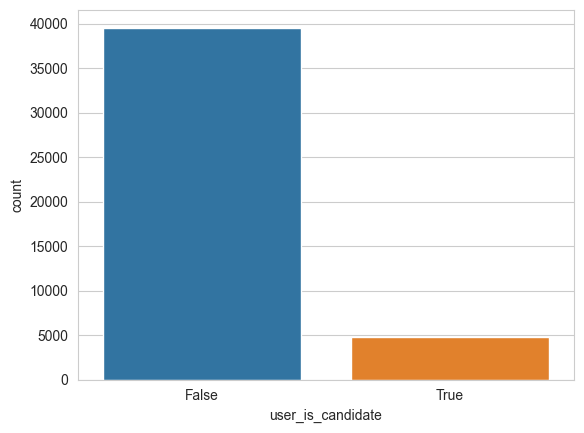

In [94]:
sns.countplot(
    df,
    x="user_is_candidate", 
    # hue='class_label',
    dodge=False,
)

In [83]:
cand_df.sort_values('TW_conversation_tweets', ascending=False).head()

,SG_UF,DS_CARGO,SQ_CANDIDATO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_MUNICIPIO_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,...,TW_replies,TW_conversation_tweets,TW_threads,TW_user_offenses,TW_reply_offenses,TW_conversation_offenses,TW_user_offense_rate,TW_reply_offense_rate,TW_conversation_offense_rate,TW_thread_offense_rate
734,SP,DEPUTADO ESTADUAL,250001610109,GIL DINIZ,22,PL,SERRA TALHADA,36.0,MASCULINO,SUPERIOR INCOMPLETO,...,17511,18106,472,133,10108,10257,0.230104,0.577237,0.566497,21.730932
861,SP,DEPUTADO ESTADUAL,250001620622,ANDRÉA WERNER,40,PSB,BELO HORIZONTE,47.0,FEMININO,SUPERIOR COMPLETO,...,10275,11354,454,111,1936,2048,0.103641,0.188418,0.180377,4.511013
671,SP,DEPUTADO ESTADUAL,250001611797,EDUARDO SUPLICY,13,PT,SÃO PAULO,81.0,MASCULINO,SUPERIOR COMPLETO,...,5947,6151,197,4,1603,1607,0.016260,0.269548,0.261258,8.157360
1015,SP,DEPUTADO ESTADUAL,250001597775,LEO SIQUEIRA,30,NOVO,SÃO PAULO,37.0,MASCULINO,SUPERIOR COMPLETO,...,2367,2564,122,41,465,492,0.108466,0.196451,0.191888,4.032787
679,SP,DEPUTADO ESTADUAL,250001619320,CARLOS GIANNAZI,50,PSOL,SÃO PAULO,61.0,MASCULINO,SUPERIOR COMPLETO,...,988,1397,361,29,144,168,0.057769,0.145749,0.120258,0.465374


(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000.]),
 [Text(-2500.0, 0, '−2500'),
  Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000')])

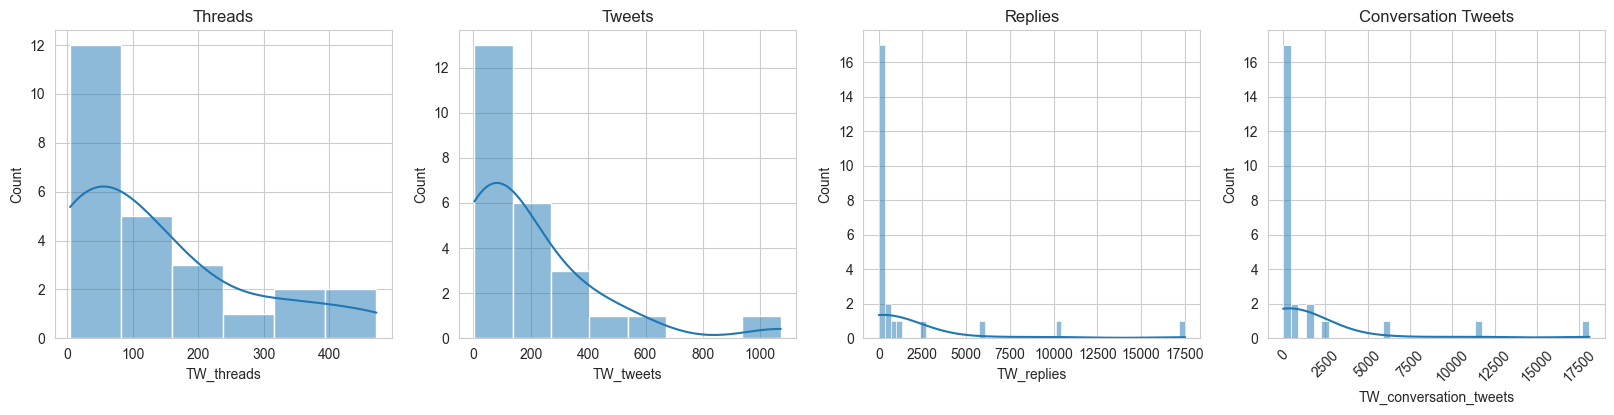

In [47]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

sns.histplot(
    cand_df,
    x="TW_threads", 
    kde=True,
    ax=ax[0],
).set(title='Threads')

sns.histplot(
    cand_df,
    x="TW_tweets", 
    kde=True,
    ax=ax[1],
).set(title='Tweets')

sns.histplot(
    cand_df,
    x="TW_replies", 
    kde=True,
    ax=ax[2],
).set(title='Replies')

sns.histplot(
    cand_df,
    x="TW_conversation_tweets", 
    kde=True,
    ax=ax[3],
).set(title='Conversation Tweets')

plt.xticks(rotation=45)

### Ofensas

In [52]:
df.class_label.value_counts()

False    28622
True     15744
Name: class_label, dtype: int64

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

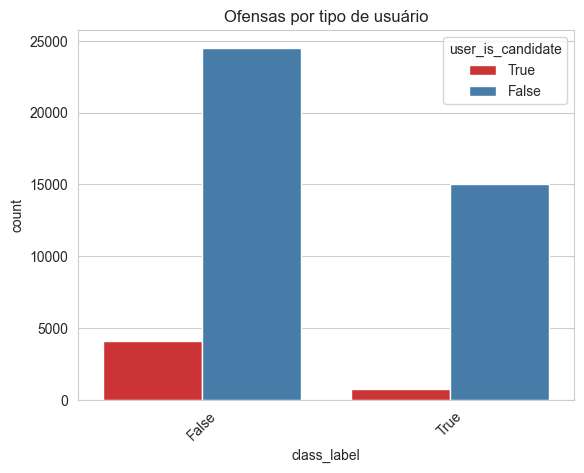

In [54]:
sns.countplot(
    df,
    hue="user_is_candidate", 
    x='class_label',
    palette='Set1',
    hue_order=[True, False],
).set(title='Ofensas por tipo de usuário')
plt.xticks(rotation=45)

(array([19236., 19243., 19250., 19257., 19266., 19273., 19280., 19287.,
        19297.]),
 [Text(19236.0, 0, '2022-09-01'),
  Text(19243.0, 0, '2022-09-08'),
  Text(19250.0, 0, '2022-09-15'),
  Text(19257.0, 0, '2022-09-22'),
  Text(19266.0, 0, '2022-10-01'),
  Text(19273.0, 0, '2022-10-08'),
  Text(19280.0, 0, '2022-10-15'),
  Text(19287.0, 0, '2022-10-22'),
  Text(19297.0, 0, '2022-11-01')])

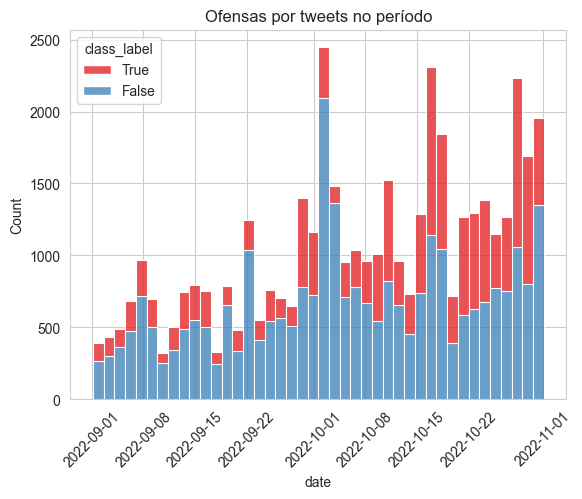

In [55]:
sns.histplot(
    df,
    x=df.date, 
    hue='class_label',
    multiple='stack',
    hue_order=[True, False],
    palette='Set1',
).set(title='Ofensas por tweets no período')
plt.xticks(rotation=45)

(array([19236., 19243., 19250., 19257., 19266., 19273., 19280., 19287.,
        19297.]),
 [Text(19236.0, 0, '2022-09-01'),
  Text(19243.0, 0, '2022-09-08'),
  Text(19250.0, 0, '2022-09-15'),
  Text(19257.0, 0, '2022-09-22'),
  Text(19266.0, 0, '2022-10-01'),
  Text(19273.0, 0, '2022-10-08'),
  Text(19280.0, 0, '2022-10-15'),
  Text(19287.0, 0, '2022-10-22'),
  Text(19297.0, 0, '2022-11-01')])

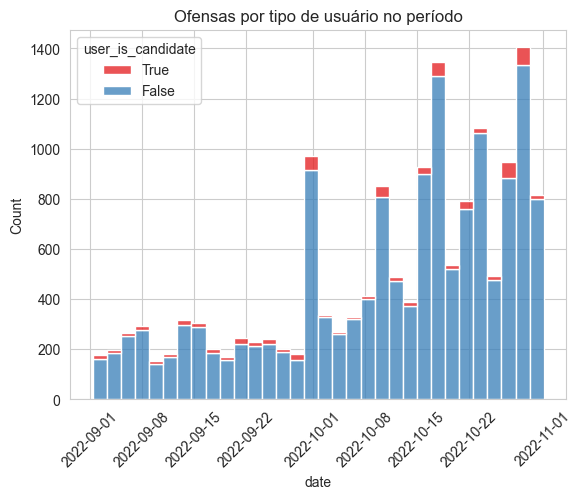

In [60]:
offense_df = df[df['class_label'] == True]

sns.histplot(
    offense_df,
    x='date', 
    hue='user_is_candidate',
    multiple='stack',
    palette='Set1',
    hue_order=[True, False],
).set(title='Ofensas por tipo de usuário no período')
plt.xticks(rotation=45)

/tmp/ipykernel_1375/2243286441.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7')])

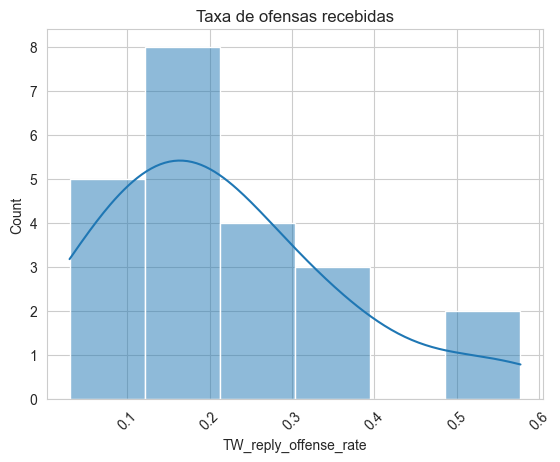

In [58]:
sns.histplot(
    cand_df[cand_df['TW_reply_offenses'] > 0],
    x='TW_reply_offense_rate',
    palette='Set1',
    kde=True,
).set(title='Taxa de ofensas recebidas')
plt.xticks(rotation=45)

### Segmentando por Gênero

In [41]:
col_name = 'DS_GENERO'
values_order = ["FEMININO", "MASCULINO"]

(array([0, 1]), [Text(0, 0, 'FEMININO'), Text(1, 0, 'MASCULINO')])

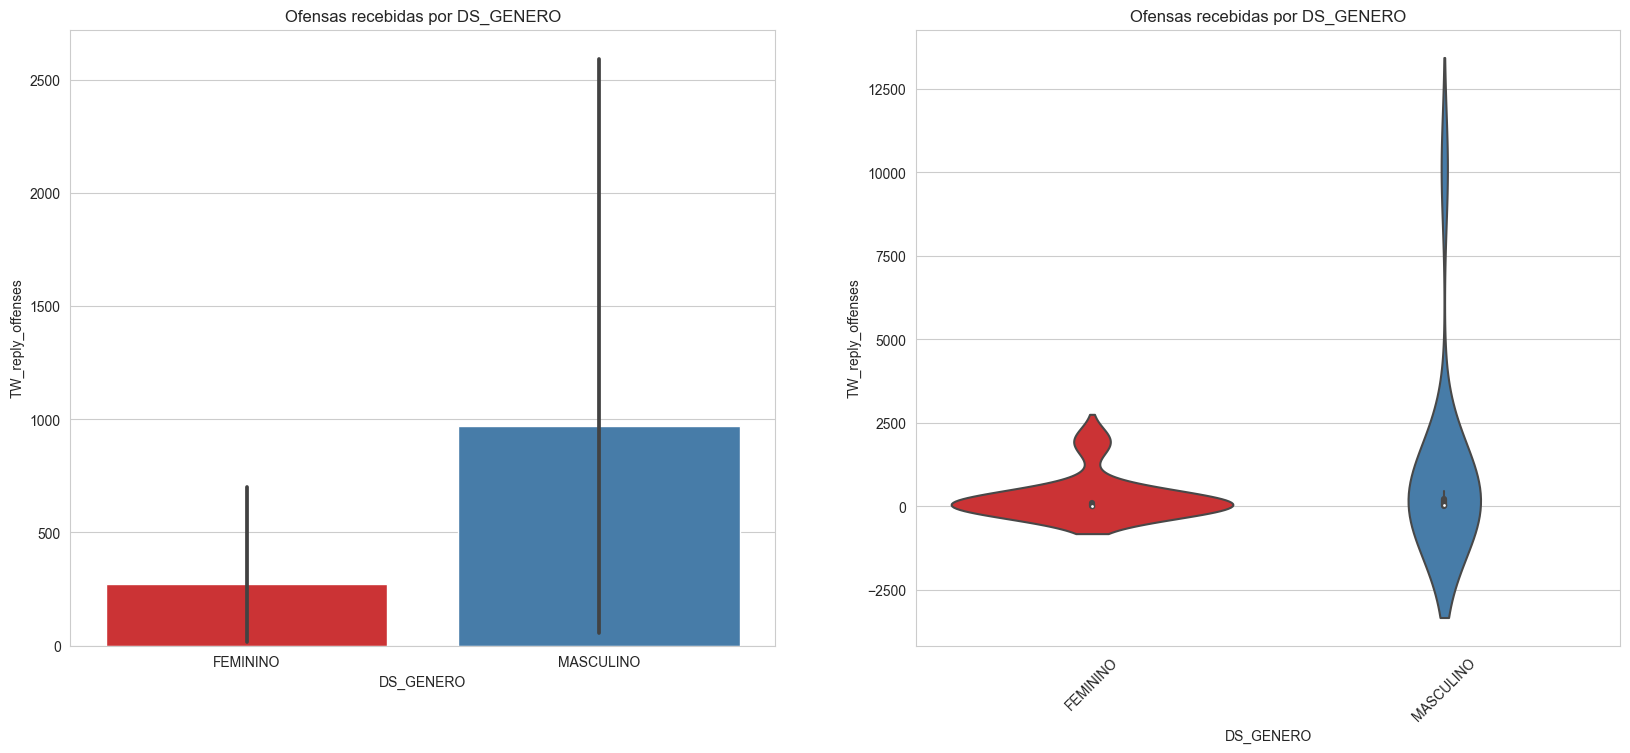

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(
    cand_df[cand_df['TW_reply_offenses'] > 0],
    y='TW_reply_offenses',
    x=col_name,
    palette='Set1',
    order=values_order,
    ax=ax[0]
).set(title=f'Ofensas recebidas por {col_name}')

sns.violinplot(
    cand_df[cand_df['TW_reply_offenses'] > 0],
    y='TW_reply_offenses',
    x=col_name,
    split=True,
    palette='Set1',
    order=values_order,
    ax=ax[1],
).set(title=f'Ofensas recebidas por {col_name}')


plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'FEMININO'), Text(1, 0, 'MASCULINO')])

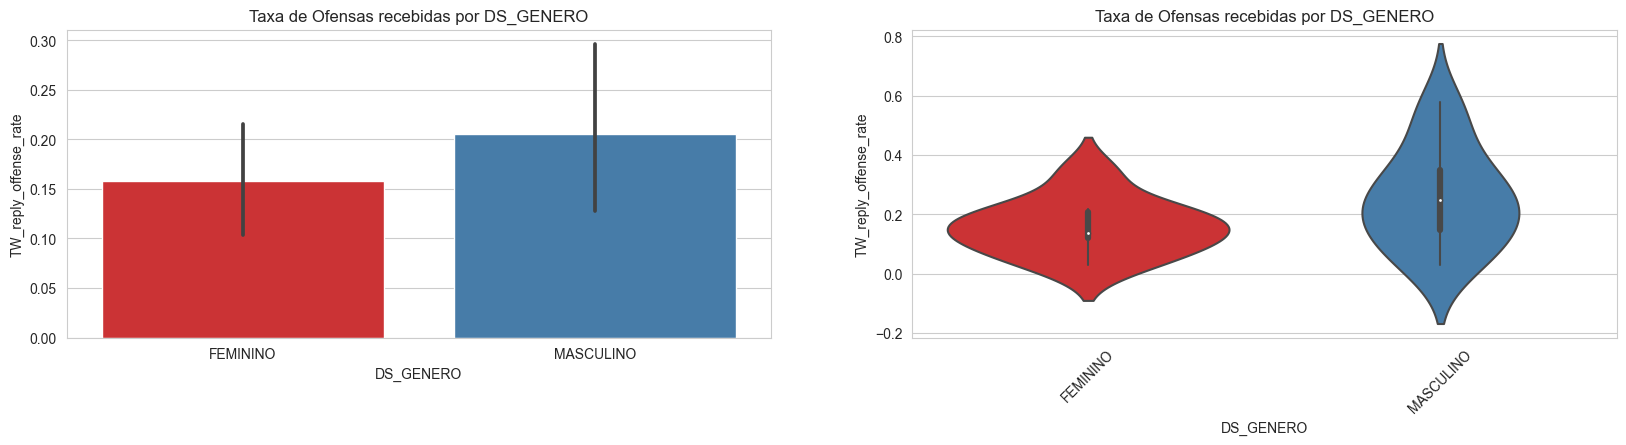

In [62]:
# To Do:
# Fazer teste removendo outliers para avaliar quanto impacta na distribuição

fig, ax = plt.subplots(1, 2, figsize=(20, 4))

sns.barplot(
    cand_df,
    y='TW_reply_offense_rate',
    x=col_name,
    palette='Set1',
    order=values_order,
    ax=ax[0]
).set(title=f'Taxa de Ofensas recebidas por {col_name}')

sns.violinplot(
    cand_df[cand_df['TW_reply_offenses'] > 0],
    y='TW_reply_offense_rate',
    x=col_name,
    split=True,
    palette='Set1',
    order=values_order,
    ax=ax[1],
).set(title=f'Taxa de Ofensas recebidas por {col_name}')


plt.xticks(rotation=45)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 [Text(-0.1, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.20000000000000004, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5000000000000001, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7')])

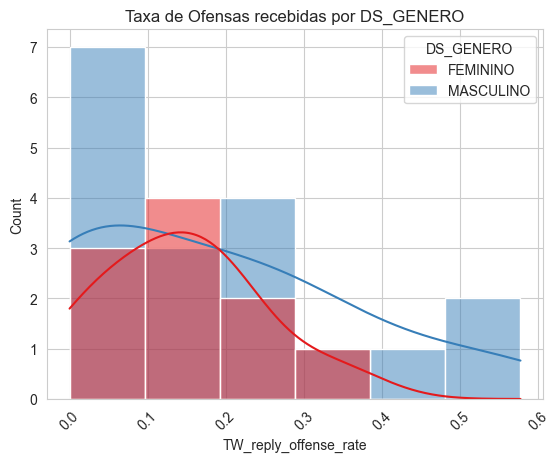

In [40]:
sns.histplot(
    cand_df,
    x='TW_reply_offense_rate',
    hue=col_name,
    palette='Set1',
    hue_order=values_order,
    kde=True,
).set(title=f'Taxa de Ofensas recebidas por {col_name}')
plt.xticks(rotation=45)

In [70]:
reply_offense_rate = cand_df['TW_reply_offense_rate'].mean()
male_reply_offense_rate = cand_df[cand_df[col_name] == 'MASCULINO']['TW_reply_offense_rate'].mean()
female_reply_offense_rate = cand_df[cand_df[col_name] == 'FEMININO']['TW_reply_offense_rate'].mean()

reply_offense_rate, male_reply_offense_rate, female_reply_offense_rate

(0.1885172523414055, 0.20560767626406118, 0.15813427647890654)

In [ ]:
# To Do: 
# - Testar normalidade das distribuições (geral, masculina e feminina)
# - Testar com Mann Whitney

In [76]:
# Teste T de Student para comparar a diferença entre as médias
from scipy import stats 
from scipy.stats import ttest_1samp, ttest_ind

male_sample = cand_df[cand_df[col_name] == 'MASCULINO']['TW_reply_offense_rate']
female_sample = cand_df[cand_df[col_name] == 'FEMININO']['TW_reply_offense_rate']

t_stat, p_value = ttest_ind(male_sample, female_sample)

print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

alpha = 0.05
if p_value > alpha:
    print('\np-valor > alpha -> Hipótese nula aceita\nNão existe diferença significativa entre os grupos')
else:
    print('\np-valor <= alpha -> Hipótese nula rejeitada\nExiste diferença significativa entre os grupos')

T-statistic value:  0.7333694703014512
P-Value:  0.4707427477068896

p-valor > alpha -> Hipótese nula aceita
Não existe diferença significativa entre os grupos
